In [1]:
import os
import sys
sys.path.append('..')

from scripts.data_utils.loaders import load_data
from scripts.utils.visualizations import plot_bar
from scripts.ab_test.metrics import compute_margin, compute_average_risk, calculate_cost_savings, rank_savings_opportunities

%load_ext autoreload
%autoreload 2

In [2]:
file_path = r"../data/AlphaCare_Risk_Insurance_data_Risk_ProfitMargin_processed.csv"
processed_df = load_data(file_path)
df = processed_df
df.shape

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-3\notebook\..\scripts\data_utils\loaders.py:8: DtypeWarning: Columns (4,32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(file_path, sep=sep)


Data loaded successfully.


(618464, 54)

In [3]:
avg_claims_by_province = {province: compute_average_risk(df, "Province", province) for province in df["Province"].unique()}
avg_claims_by_province

{'Gauteng': 0.42888927480749073,
 'KwaZulu-Natal': 0.26474645146103315,
 'Mpumalanga': 0.3926976895015563,
 'EasternCape': 0.23558851652254742,
 'WesternCape': 0.3417503129575668,
 'Limpopo': 0.3487120371329607,
 'NorthWest': 0.28534843459632137,
 'FreeState': 0.10620929937799883,
 'NorthernCape': 0.20383085693985306}

In [4]:
avg_margin_by_gender = {gender: compute_margin(df, "Gender", gender) for gender in df["Gender"].unique()}
avg_margin_by_gender

{'Notspecified': -0.9331944760078408,
 'Male': 17.45117170935069,
 'Female': 16.804688523031988}

# Analyze savings opportunities

In [5]:
# Analyze savings for provinces
province_savings = calculate_cost_savings(df, group_col="Province", cost_col="TotalPremium", claim_col="TotalClaims")
top_province_opportunities = rank_savings_opportunities(province_savings, threshold=5)
top_province_opportunities # Top Provinces for Savings Opportunities

,Province,TotalCost,TotalClaims,SavingsPotential,SavingsPercentage
0,NorthernCape,3.165581e+05,8.949051e+04,2.270676e+05,71.730145
1,FreeState,5.213632e+05,2.659749e+05,2.553883e+05,48.984723
2,EasternCape,2.140104e+06,1.346308e+06,7.937961e+05,37.091475
3,Limpopo,1.537324e+06,9.918930e+05,5.454315e+05,35.479271
4,Mpumalanga,2.836292e+06,2.035792e+06,8.004995e+05,28.223451
5,NorthWest,7.490508e+06,5.593723e+06,1.896786e+06,25.322521


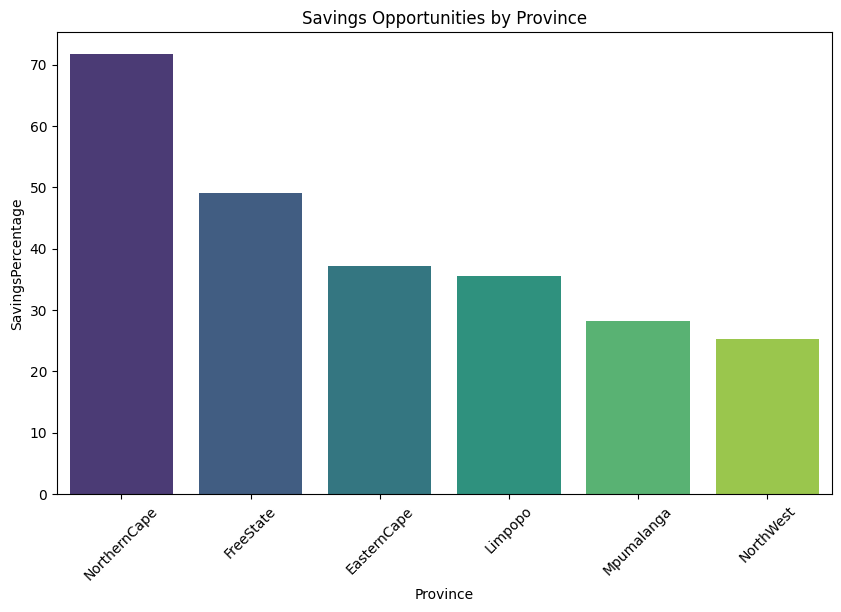

In [16]:
plot_bar(data=top_province_opportunities, x_column="Province", y_column='SavingsPercentage', title='Savings Opportunities by Province')

In [6]:
# Analyze savings for zip codes
zipcode_savings = calculate_cost_savings(df, group_col="PostalCode", cost_col="TotalPremium", claim_col="TotalClaims")
top_zipcode_opportunities = rank_savings_opportunities(zipcode_savings, threshold=5)
top_zipcode_opportunities # Top Zip Codes for Savings Opportunities

,PostalCode,TotalCost,TotalClaims,SavingsPotential,SavingsPercentage
0,4,8773.975714,0.000000,8773.975714,100.000000
1,4062,8527.814389,0.000000,8527.814389,100.000000
2,3965,6922.697807,0.000000,6922.697807,100.000000
3,3968,13029.733421,0.000000,13029.733421,100.000000
4,3974,9006.948193,0.000000,9006.948193,100.000000
...,...,...,...,...,...
665,4132,27305.219943,25151.131579,2154.088364,7.888925
666,1441,48845.807669,45090.587719,3755.219950,7.687906
667,450,112109.701570,104281.807018,7827.894552,6.982353
668,175,32199.600266,30115.789474,2083.810792,6.471542


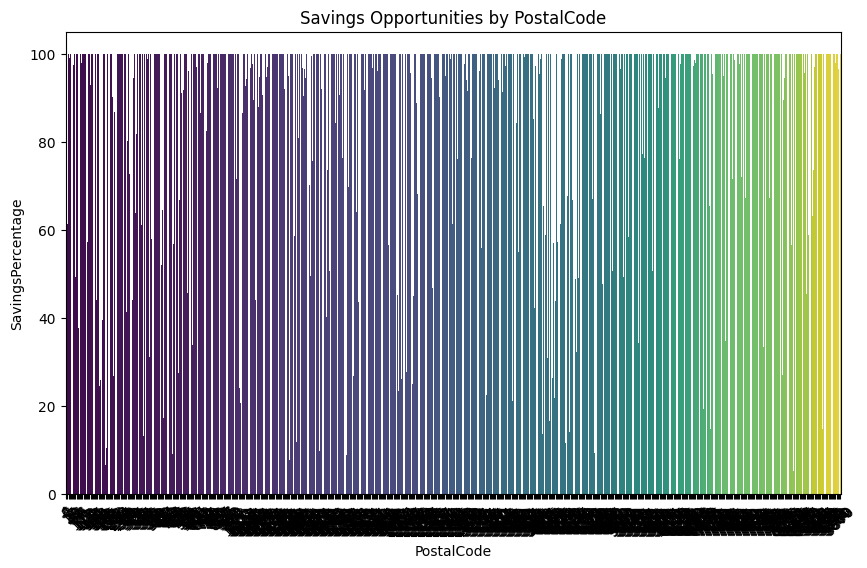

In [12]:
plot_bar(data=top_zipcode_opportunities, x_column="PostalCode", y_column='SavingsPercentage', title='Savings Opportunities by PostalCode')